# Importaciones

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


# Leer Datos

In [2]:
df = pd.read_csv('winequality-red.csv')

# EDA

In [3]:
df['quality'].describe() # Para obtener estadísticas solo de la columna 'quality'

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


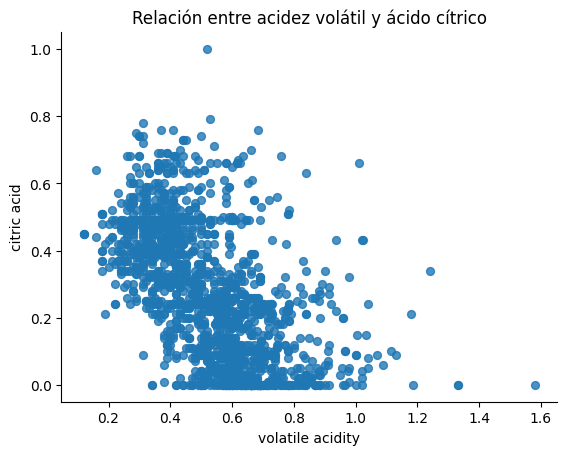

In [6]:
df.plot(kind='scatter', x='volatile acidity', y='citric acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Relación entre acidez volátil y ácido cítrico")  # Agrega esta línea
plt.show()  # Muestra el gráfico con el título

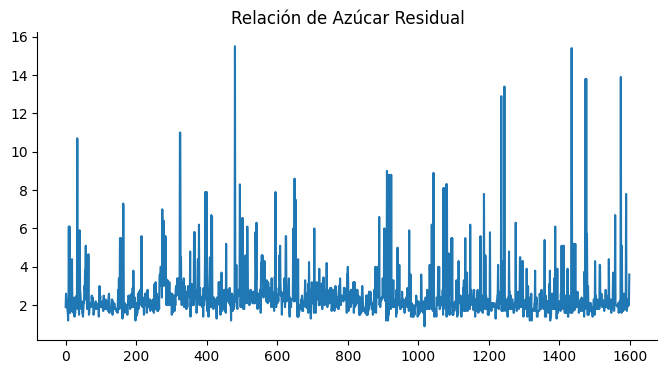

In [7]:
df['residual sugar'].plot(kind='line', figsize=(8, 4), title='residual sugar')
plt.title("Relación de Azúcar Residual")  # Agrega esta línea
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Codificacion

In [9]:
df['quality'] = df['quality'].astype(float) # Convertimos columna 'quality' a tipo 'float'

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop("quality", axis=1)
y = df["quality"]    # Variable Objetivo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [11]:
df['quality'] = df['quality'].astype(float) # Convertimos columna 'quality' a tipo 'float'

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

modelo = RandomForestClassifier(n_estimators=500)
modelo.fit(x_train, y_train)

# Predecir
predicciones = modelo.predict(x_test)

# Evaluar
accuracy = accuracy_score(y_test, predicciones)

In [17]:
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.6666666666666666
